In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!cp gdrive/MyDrive/dontpatronizeme_pcl.tsv .
!cp gdrive/MyDrive/dontpatronizeme_categories.tsv .
!cp gdrive/MyDrive/train_semeval_parids-labels.csv .
!cp gdrive/MyDrive/dev_semeval_parids-labels.csv .
!cp gdrive/MyDrive/DPM_preprocessing_over_sampling2_train_test_80_20.py .

In [3]:
import random
import string
import os
from urllib import request

In [4]:
!pip install unidecode

     |████████████████████████████████| 235 kB 5.1 MB/s 


In [5]:
from DPM_preprocessing_over_sampling2_train_test_80_20 import DPM_preprocessing
dpm = DPM_preprocessing('.', 'dontpatronizeme_pcl.tsv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
dpm.load_task1()
dpm.train_task1_df.head()

,par_id,art_id,keyword,country,text,label,orig_label
0,1,@@24942188,hopeless,ph,"we 're living in times of absolute insanity , ...",0,0
1,2,@@21968160,migrant,gh,"in libya today , there are countless number of...",0,0
2,3,@@16584954,immigrant,ie,"""white house press secretary sean spicer said ...",0,0
3,4,@@7811231,disabled,nz,council customers only signs would be displaye...,0,0
4,5,@@1494111,refugee,ca,""""""" just like we received migrants fleeing el ...",0,0


In [7]:
dpm.train_task1_df.shape

(10469, 7)

In [8]:
dpm.load_task2()
dpm.train_task2_df.head()

Map of label to numerical label:
{'Unbalanced_power_relations': 0, 'Shallow_solution': 1, 'Presupposition': 2, 'Authority_voice': 3, 'Metaphors': 4, 'Compassion': 5, 'The_poorer_the_merrier': 6}


,par_id,art_id,text,keyword,country,label
0,4046,@@14767805,we also know that they can benefit by receivin...,hopeless,us,"[1, 0, 0, 1, 0, 0, 0]"
1,1279,@@7896098,pope francis washed and kissed the feet of mus...,refugee,ng,"[0, 1, 0, 0, 0, 0, 0]"
2,8330,@@17252299,many refugees do n't want to be resettled anyw...,refugee,ng,"[0, 0, 1, 0, 0, 0, 0]"
3,4063,@@3002894,"""budding chefs , like """" fred """" , """" winston ...",in-need,ie,"[1, 0, 0, 1, 1, 1, 0]"
4,4089,@@25597822,"""in a 90-degree view of his constituency , one...",homeless,pk,"[1, 0, 0, 0, 0, 0, 0]"


In [9]:
dpm.train_task2_df.shape

(993, 6)

invoke preprocessing when load_all_positive

In [10]:
dpm.load_all_positive()
dpm._80_positive_df.head(20)

,par_id,art_id,keyword,country,text,label,text_span
0,4046,@@14767805,hopeless,us,from someone who can help them understand tha...,Authority_voice,put their situation in perspective
1,4046,@@14767805,hopeless,us,is not hopeless someone who can help them put...,Authority_voice,put their situation in perspective
2,4046,@@14767805,hopeless,us,who can help them put their situation in pers...,Authority_voice,put their situation in perspective
3,4046,@@14767805,hopeless,us,that their feelings are normal and that their...,Unbalanced_power_relations,help them communicate with others
4,4046,@@14767805,hopeless,us,help them put their situation in perspective ...,Unbalanced_power_relations,help them communicate with others
5,4046,@@14767805,hopeless,us,in perspective and help them communicate with...,Unbalanced_power_relations,help them communicate with others
6,4046,@@14767805,hopeless,us,normal and that their situation is not hopele...,Unbalanced_power_relations,who could provide support
7,4046,@@14767805,hopeless,us,and help them communicate with others who cou...,Unbalanced_power_relations,who could provide support
8,4046,@@14767805,hopeless,us,with others who could provide support someone,Unbalanced_power_relations,who could provide support
9,4046,@@14767805,hopeless,us,and help them communicate with others who cou...,Authority_voice,plan for their needs and the needs of their child


In [11]:
dpm._20_positive_df.head(20)

,par_id,art_id,keyword,country,text,label,text_span
0,4060,@@8618742,refugee,za,afghanistanafp mahdy mehraeenafghan boy murta...,Metaphors,who captivated hearts
1,4060,@@8618742,refugee,za,his idol lionel messi h the young afghan boy ...,Metaphors,who captivated hearts
2,4060,@@8618742,refugee,za,young afghan boy who captivated hearts after ...,Metaphors,who captivated hearts
3,4830,@@25759381,women,tz,level of diligence and zeal for success that ...,The_poorer_the_merrier,the level of diligence and zeal for success th...
4,4830,@@25759381,women,tz,level of diligence and zeal for success that ...,The_poorer_the_merrier,the level of diligence and zeal for success th...
5,4830,@@25759381,women,tz,level of diligence and zeal for success that ...,The_poorer_the_merrier,the level of diligence and zeal for success th...
6,4830,@@25759381,women,tz,of diligence and zeal for success that women ...,Presupposition,gone are the days of subjecting women to secon...
7,4830,@@25759381,women,tz,the pinnacle of success which they enjoy toda...,Presupposition,gone are the days of subjecting women to secon...
8,4830,@@25759381,women,tz,they enjoy today gone are the days of subject...,Presupposition,gone are the days of subjecting women to secon...
9,4830,@@25759381,women,tz,level of diligence and zeal for success that ...,Authority_voice,the level of diligence and zeal for success th...


In [12]:
dpm._80_positive_df.shape

(6621, 7)

In [13]:
dpm._20_positive_df.shape

(1659, 7)

In [14]:
df1_80 = dpm._80_positive_df
df1_80 = df1_80.rename(columns={'text': 'sentence'})
df1_80 = df1_80.assign(label=1)
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df1_80.shape[0]))
df1_80 = df1_80.drop(['art_id', 'keyword', 'country', 'text_span'], axis = 1)

# Display 10 random rows from the data.
df1_80.sample(10)

Number of training sentences: 6,621



,par_id,sentence,label
2698,10020,if life is hard for differentlyabled adults w...,1
5526,486,the camp on tuesday the european union s top ...,1
2378,1899,courage a lion heart who spoke up for the vio...,1
5377,1824,i am climbing all these summits to raise fund...,1
2940,516,group believes that only a nana addobawumia a...,1
4492,1396,the spotlight on her at the un the prime mini...,1
1124,8256,conspiracy i d like every one of them to expe...,1
5587,6284,ways to open the doors wider for our,1
2192,2695,we have instead observed has been an everesca...,1
3898,6049,to look for a single sponsor but soon cashric...,1


In [15]:
df1_20 = dpm._20_positive_df
df1_20 = df1_20.rename(columns={'text': 'sentence'})
df1_20 = df1_20.assign(label=1)
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df1_20.shape[0]))
df1_20 = df1_20.drop(['art_id', 'keyword', 'country', 'text_span'], axis = 1)

# Display 10 random rows from the data.
df1_20.sample(10)

Number of training sentences: 1,659



,par_id,sentence,label
812,1397,of place a man in a suit and his smartly dres...,1
68,6501,or prison and a new suit and hair and makeup ...,1
1007,1643,your help every day through christmas eve the...,1
729,6833,are from desperately poor horn of africa coun...,1
1556,4541,in baton rouge the image was a striking juxta...,1
89,3087,has identified lowquality education as the ma...,1
741,1036,he is not the first to be supplied with a hou...,1
0,4060,afghanistanafp mahdy mehraeenafghan boy murta...,1
49,1266,but hopelessly illequipped to save him from h...,1
1636,873,poor families the shiv sena said instead of a...,1


In [16]:
dpm.load_all_negative()
dpm._80_negative_df.head()

,par_id,art_id,keyword,country,text,label,orig_label
0,1,@@24942188,hopeless,ph,we re living in times of absolute insanity as ...,0,0
1,2,@@21968160,migrant,gh,in libya today there are countless number of g...,0,0
2,3,@@16584954,immigrant,ie,white house press secretary sean spicer said t...,0,0
3,4,@@7811231,disabled,nz,council customers only signs would be displaye...,0,0
4,5,@@1494111,refugee,ca,just like we received migrants fleeing el sal...,0,0


In [17]:
dpm._20_negative_df.head()

,par_id,art_id,keyword,country,text,label,orig_label
0,7580,@@1447262,vulnerable,us,the subsequent everywhere in which he carries ...,0,0
1,7581,@@60059920,women,ie,2 women amp 2 young children are led away by a...,0,0
2,7582,@@9657057,immigrant,ie,on the television was the lizardlike nigel far...,0,0
3,7583,@@1052273,women,au,gender equality has also been a task that reev...,0,0
4,7584,@@1857908,vulnerable,tz,the 97 percent of youth that works on the info...,0,0


In [18]:
dpm._80_negative_df.shape

(6847, 7)

In [19]:
dpm._20_negative_df.shape

(2629, 7)

In [20]:
df2_80 = dpm._80_negative_df
df2_80 = df2_80.rename(columns={'text': 'sentence'})
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df2_80.shape[0]))
df2_80 = df2_80.drop(['art_id', 'keyword', 'country', 'orig_label'], axis = 1)

# Display 10 random rows from the data.
df2_80.sample(10)

Number of training sentences: 6,847



,par_id,sentence,label
4608,5080,we have been left hopelessly nursing the woun...,0
1348,1518,he said between 2012 and 2018 a total of 700 i...,0
1053,1179,the cash bail system is not only fraught with ...,0
4440,4899,three years after the subprime lending crisis ...,0
1091,1223,so far 420 people who work in catechesis have ...,0
5484,6064,motherhood for too many women is about ill he...,0
5099,5627,roughly 90 percent of migrants who reach the l...,0
4545,5011,the conference also decided to monitor the han...,0
2494,2769,in a statement the ministry of health noted th...,0
3622,4008,about 40 refugees have been identified by the ...,0


In [21]:
df2_20 = dpm._20_negative_df
df2_20 = df2_20.rename(columns={'text': 'sentence'})
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df2_20.shape[0]))
df2_20 = df2_20.drop(['art_id', 'keyword', 'country', 'orig_label'], axis = 1)

# Display 10 random rows from the data.
df2_20.sample(10)

Number of training sentences: 2,629



,par_id,sentence,label
2473,10292,marriages of minor girls from poor muslim fami...,0
2143,9935,she also took the time to call on women to par...,0
2395,10208,video unruly group of homeless men causing pro...,0
2318,10127,trains packed with muslim refugees arrive in k...,0
533,8161,my fiance is a disabled united states us citiz...,0
707,8358,slater amp gordon itself is also being pursued...,0
1492,9214,it is estimated that 60 per cent of rohingya r...,0
490,8113,however she said since january this year the i...,0
851,8512,we felt hopeless when we saw there was no lau...,0
1979,9754,bronze takes up the argument people will tend ...,0


In [22]:
import pandas as pd
frames = [df1_80, df2_80]
newDfTrain = pd.concat(frames)

from sklearn.utils import shuffle
newDfTrain = shuffle(newDfTrain)
#newDf.sample(10)
newDfTrain.head()
newDfTrain.shape

(13468, 3)

In [23]:
import pandas as pd
frames = [df1_20, df2_20]
newDfTest = pd.concat(frames)

from sklearn.utils import shuffle
newDfTest = shuffle(newDfTest)
#newDf.sample(10)
newDfTest.head()
newDfTest.shape

(4288, 3)

In [24]:
import torch
save_file = 'prepared_DPM_preprocessing_newDfTrain_80.pkl'
newDfTrain.to_pickle(save_file)


In [25]:
import torch
save_file = 'prepared_DPM_preprocessing_newDfTest_20.pkl'
newDfTest.to_pickle(save_file)

In [26]:
!cp /content/*.pkl -r gdrive/MyDrive/

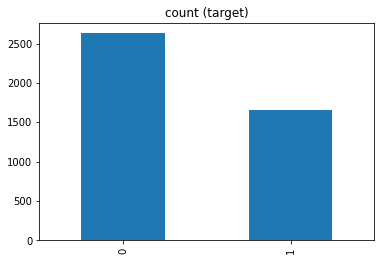

In [27]:
newDfTest['label'].value_counts().plot(kind='bar', title='count (target)')

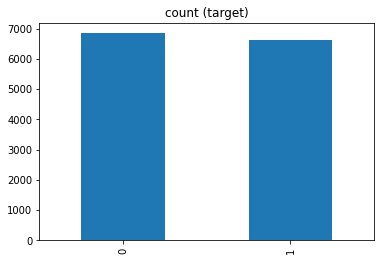

In [28]:
newDfTrain['label'].value_counts().plot(kind='bar', title='count (target)')